In [1]:
import numpy as np
import PIL.Image

In [41]:
class Vec3:
    def __init__(self, x, y, z):
        self.__vec = np.array([x,y,z], dtype=np.float)

    @property
    def vec(self):
        return self.__vec

    @classmethod
    def from_array(cls, v):
        return Vec3(v[0], v[1], v[2])

    def __add__(self, other):
        return Vec3.from_array(self.__vec + other.__vec)

    def __sub__(self, other):
        return Vec3.from_array(self.__vec - other.__vec)

    def __mul__(self, other):
        return Vec3.from_array(self.__vec * other)

    def __rmul__(self, other):
        return Vec3.from_array(self.__vec * other)

    def __truediv__(self, other):
        return Vec3.from_array(self.__vec / other)

    def normalize(self):
        return Vec3.from_array(self.__vec / np.linalg.norm(self.__vec))

    @property
    def x(self):
        return self.__vec[0]
    
    @property
    def y(self):
        return self.__vec[1]

    @property
    def z(self):
        return self.__vec[2]

    @property
    def r(self):
        return (int)(self.x * 255.0)

    @property
    def g(self):
        return (int)(self.y * 255.0)
    
    @property
    def b(self):
        return (int)(self.z * 255.0)

In [42]:
class Ray:
    def __init__(self, orig=Vec3(0,0,0), d=Vec3(1,0,0)):
        self.__origin = orig
        self.__direction = d

    @property
    def origin(self):
        return self.__origin

    @property
    def direction(self):
        return self.__direction

    def point_at(self, t):
        return self.__origin + (t * self.__direction)
        

In [43]:
def color(ray):
    d = ray.direction.normalize()
    t = 0.5 * (d.y + 1.0)
    return ((1.0 - t)*Vec3(1.0, 1.0, 1.0)) + (t*Vec3(0.5, 0.7, 1.0))

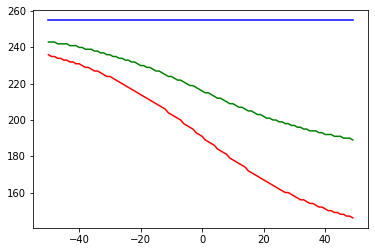

In [44]:
data = []
for i in range(-50,50):
    ray = Ray(d=Vec3(-50.0,i,1.0))
    data.append(color(ray))

import matplotlib.pyplot as plt

plt.plot(range(-50,50), [i.r for i in data], color='red')
plt.plot(range(-50,50), [i.g for i in data], color='green')
plt.plot(range(-50,50), [i.b for i in data], color='blue')
plt.show()

In [45]:
def main():
    ascpect_ratio = 16.0 / 9.0
    image_width = 384
    image_height = (int)(image_width / ascpect_ratio)
    print(f'{image_width} x {image_height}')

    image = np.zeros([image_height, image_width, 3], dtype='uint8')

    viewport_height = 2.0
    viewport_width = ascpect_ratio * viewport_height

    print(f'viewport = {viewport_width} x {viewport_height}')

    focal_length = 1.0

    origin = Vec3(0,0,0)
    horizontal = Vec3(viewport_width, 0, 0)
    vertical = Vec3(0, viewport_height, 0)

    lower_left_corner = origin - horizontal/2 - vertical/2 - Vec3(0,0,focal_length)

    print(f'rect = ({lower_left_corner.x},{lower_left_corner.y},{lower_left_corner.z})')

    for j in range(image_height-1, -1, -1):
        for i in range(image_width):
            u = i / (float)(image_width-1)
            v = j / (float)(image_height-1)
            ray = Ray(origin, lower_left_corner + u*horizontal + v*vertical - origin)
            c = color(ray)
            image[j, i] = [c.r, c.g, c.b]

    im = PIL.Image.fromarray(image, mode='RGB')
    im.save("test.jpg")

main()

384 x 216
viewport = 3.5555555555555554 x 2.0
rect = (-1.7777777777777777,-1.0,-1.0)
